In [1]:
import numpy as np
from IPython.display import clear_output
from scipy import interpolate

In [2]:
Nx = 2**6
Nt = 2**18
dx = 1/Nx
dz = 4*dx
dt = 1/Nt
xx = np.arange(0,1+dx,dx)
zz = np.arange(0,1+dz,dz)
tt = np.arange(0,0.25+dt,dt)
nu = 0.025
resolution = 2048*2

def compute_u0(xx,zz, mean=0, std_dev=0):
    mean = 0
    std_dev = 1
    u0_ = np.random.normal(mean, std_dev, zz.shape[0])
    spl = interpolate.splrep(zz,u0_)
    u0 = interpolate.splev(xx,spl)
    u0[0] = 0
    u0[-1] = 0
    return u0

In [9]:
input_list = []
output_list = []
N_samples = 100
for n in range(N_samples):
    u0 = compute_u0(xx,zz)
    uh = np.zeros((xx.shape[0],tt.shape[0]))
    uh[:,0] = u0
    last_j=0
    for j in range(0, tt.shape[0]-1):
        for i in range(1, xx.shape[0]-1):
            uh[i,j+1] = uh[i,j] + nu*dt*(uh[i+1,j] - 2*uh[i,j] + uh[i-1,j])/(dx**2) - 0.5*dt*(uh[i,j]**2-uh[i-1,j]**2)/dx
        if np.mod(j,resolution)==0 and not(j==0):
            factor = np.amax(np.abs(uh[:,last_j]))
            input_list.append(1/factor*uh[:,last_j])
            output_list.append(1/factor*(uh[:,j]))
            last_j=j
    clear_output(wait=True)
    print('Advancing: '+str((n+1)/N_samples*100) +'%')

Advancing: 100.0%


In [10]:
input = np.array(input_list)
output = np.array(output_list)

from sklearn.model_selection import train_test_split
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2)

In [6]:
save_flag = False
# save_flag = True
if save_flag:
    np.save('../data/Burgers_time/input_train.npy', input_train)
    np.save('../data/Burgers_time/output_train.npy', output_train)
    np.save('../data/Burgers_time/input_test.npy', input_test)
    np.save('../data/Burgers_time/output_test.npy', output_test)
    print('dataset saved')
else:
    print('dataset not saved')

dataset saved


In [11]:
add_flag = False
# add_flag = True
if add_flag:
    folder = 'Burgers_time'
    input_train_old=np.load('../data/' + folder + '/input_train.npy')
    input_test_old=np.load('../data/' + folder + '/input_test.npy')
    output_train_old=np.load('../data/' + folder + '/output_train.npy')
    output_test_old=np.load('../data/' + folder + '/output_test.npy')
    input_train_new = np.concatenate((input_train_old, input_train))
    input_test_new = np.concatenate((input_test_old, input_test))
    output_train_new = np.concatenate((output_train_old, output_train))
    output_test_new = np.concatenate((output_test_old, output_test))
    np.save('../data/Burgers_time/input_train.npy', input_train_new)
    np.save('../data/Burgers_time/output_train.npy', output_train_new)
    np.save('../data/Burgers_time/input_test.npy', input_test_new)
    np.save('../data/Burgers_time/output_test.npy', output_test_new)
    print('dataset augmented')
else:
    print('dataset not augmented')

dataset augmented


c:\Users\adria\miniforge3\envs\my-env\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


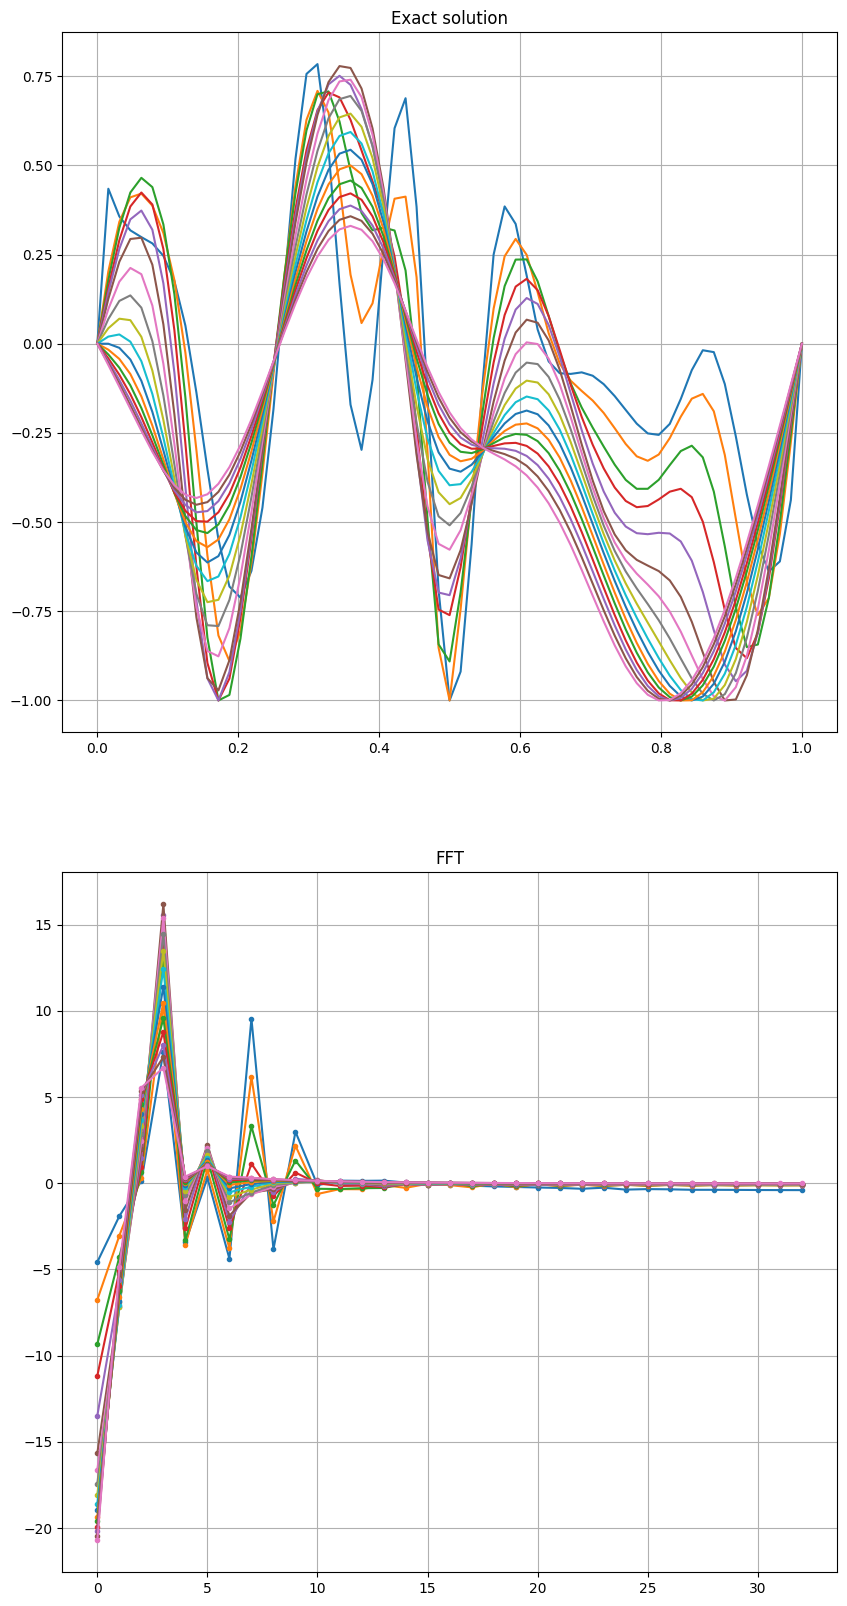

In [148]:
import matplotlib.pyplot as plt
import tensorflow as tf
fig = plt.figure(figsize=(10, 20))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
for j,t in enumerate(tt):
    if np.mod(j,resolution)==0:
        ax1.set_title('Exact solution')
        factor = np.amax(np.abs(uh[:,j]))
        ax1.plot(xx, 1/factor*uh[:,j])
        ax1.grid(True)
        ax2.set_title('FFT')
        ax2.plot(tf.signal.rfft(1/factor*uh[:,j]), marker='.')
        ax2.grid(True)


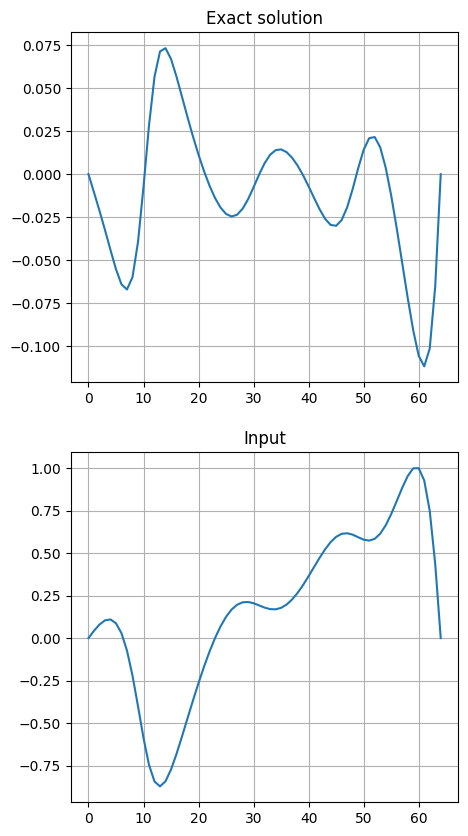

In [149]:
from random import randint
index = randint(0, input_train.shape[0]-1)

fig = plt.figure(figsize=(5, 10))

ax = fig.add_subplot(2, 1, 1)
ax.set_title('Exact solution')
m = ax.plot(output_train[index])
# m = ax.plot(input_test[index])
# ax.set_ylim([np.amin(output_test[index])-0.01, np.amax(output_test[index])+0.01])
ax.grid(True)

ax = fig.add_subplot(2, 1, 2)
ax.set_title('Input')
m = ax.plot(input_train[index])
# ax.set_ylim([np.amin(output_test[index])-0.01, np.amax(output_test[index])+0.01])
ax.grid(True)